# Data Analysis

## Cargando dataset y preparación

In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Configuración Jupyter
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")

# Cargamos el dataframe ya limpio desde el análisis de Features
data_ana_corona = pd.read_csv("data_ana_coronaperiod.csv", sep = ',', parse_dates=['release_date_year'])
data_ana_corona = data_ana_corona.drop(columns=['Unnamed: 0'])

print('Tamaño inicial: ',data_ana_corona.shape)
data_ana_corona.sample(2)

Tamaño inicial:  (1581, 37)


,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,artist_followers,artist_popularity,streamstotal_weights
281,Tanta Falta,Bryant Myers,31092,2019-03-16,0sPTfDSZgE3KvcvqaKPtEx,2019,57002,Tanta Falta,2018-10-10,0.274027,0.20,0.13500,0.856,0.728,0.000001,0.200,0.904301,0.099016,0.797,0.18409,4,2018-01-01,latin,reggaeton,reggaeton flow,trap latino,tropical,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton flow,trap latino,tro...",6w9ToX5slZ4uIdmD17hJ3c,3946903,0.808081,0.000061
1070,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,46847,2019-03-13,27rdGxbavYJeBphck5MZAF,2019,2598410,Nothing Breaks Like a Heart (feat. Miley Cyrus),2018-11-30,0.367298,0.78,0.00987,0.601,0.794,0.000001,0.388,0.827249,0.063550,0.244,0.34489,4,2018-01-01,dance pop,pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"dance pop,pop",3hv9jJF3adDNsBSIQDqcjp,837249,0.797980,0.002786


# Genres analysis

En la extracción hemos metido cada género del artista en una columna para facilitar el análisis, siendo, genre1, genre2, genre3... Por si acaso, hemos dejado una columna con la lista completa de genres como un string.

De los artistas hemos extraido los géneros en los que están clasificados en Spotify, que no nos dice solo uno, sino hasta 10 diferentes, lo que nos dificulta destacar porque algunos artistas tienen hasta 7 géneros asignados que pueden coincidir o no con otros artistas. Esto puede desvirtuar el análisis y dificultar la agrupación de estilos, porque si, por ejemplo, una canción puede tener como genre1 un género muy específico (ej. colombian pop) y está como el primero en la lista del artista, en vez de un género más general (ej. pop).


((Fuente externa Most popular genres:
1	☊	pop
2	☊	dance pop
3	☊	rap
4	☊	pop rap
5	☊	rock
6	☊	post-teen pop
7	☊	latin
8	☊	hip hop
9	☊	trap
10	☊	edm
11	☊	modern rock
12	☊	tropical house
13	☊	pop rock
14	☊	melodic rap
15	☊	reggaeton
16	☊	latin pop
17	☊	classic rock
18	☊	electropop
19	☊	mellow gold
20	☊	album rock
http://everynoise.com/everynoise1d.cgi?vector=popularity&scope=all))

In [9]:
# Echamos un primer vistazo a las columnas
print(data_ana_corona.shape)
data_ana_corona[data_ana_corona['genre2'] =='latin'].head(3)


(1581, 37)


,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,artist_followers,artist_popularity,streamstotal_weights
298,Coronao Now (Remix),El Alfa,82555,2020-03-13,047WmwIeerHyIUstFAEz5A,2020,3143292,Coronao Now (Remix),2020-02-12,0.451159,0.71,0.255,0.883,0.853,0.000723,0.412,0.862410,0.209612,0.695,0.371194,4,2020-01-01,dembow,latin,rap dominicano,reggaeton,tropical,NaN,NaN,NaN,NaN,NaN,"dembow,latin,rap dominicano,reggaeton,tropical",2oQX8QiMXOyuqbcZEFsZfm,1122213,0.838384,0.002806
299,4K,El Alfa,56099,2020-03-13,4xI3U4sDj1TPmO9Iz5TkYp,2020,4475589,4K,2020-03-12,0.326357,0.81,0.357,0.925,0.900,0.005950,0.124,0.875936,0.174870,0.804,0.384744,4,2020-01-01,dembow,latin,rap dominicano,reggaeton,tropical,NaN,NaN,NaN,NaN,NaN,"dembow,latin,rap dominicano,reggaeton,tropical",2oQX8QiMXOyuqbcZEFsZfm,1122213,0.838384,0.003995
300,Coronao Now,El Alfa,46034,2020-03-13,7FbKipScVxkjQxQXwTd0gL,2020,446298,Coronao Now,2019-11-07,0.368363,0.70,0.146,0.941,0.729,0.004510,0.180,0.770913,0.322525,0.718,0.371348,4,2019-01-01,dembow,latin,rap dominicano,reggaeton,tropical,NaN,NaN,NaN,NaN,NaN,"dembow,latin,rap dominicano,reggaeton,tropical",2oQX8QiMXOyuqbcZEFsZfm,1122213,0.838384,0.000398


In [10]:
# Vemos los artistas que más veces salen 
data_ana_corona.Artist.value_counts()

Bad Bunny           44
J Balvin            31
Ozuna               28
C. Tangana          25
Ed Sheeran          22
                    ..
Matt Hunter          1
Monsieur Periné      1
KvndySwing           1
Love of Lesbian      1
Lennis Rodriguez     1
Name: Artist, Length: 452, dtype: int64

In [11]:
#Contamos el número de canciones para cada género analizando la columna genre1 y siguientes
number_genres = data_ana_corona.genre1.value_counts()
# number_genres = data_ana_corona.genre2.value_counts()
# number_genres = data_ana_corona.genre3.value_counts()
number_genres.head(60)

latin                        369
dance pop                    201
colombian pop                 83
spanish pop                   65
pop                           57
trap espanol                  55
cantautor                     54
latin pop                     48
latin arena pop               34
big room                      31
r&b en espanol                28
canadian contemporary r&b     22
spanish hip hop               22
argentine hip hop             21
canadian hip hop              19
electropop                    19
flamenco urbano               18
reggaeton                     17
modern rock                   15
rap espanol                   14
eurovision                    13
dfw rap                       13
dominican pop                 13
conscious hip hop             12
boy band                      12
canadian pop                  11
panamanian pop                11
champeta                      11
garage rock                   11
trap latino                   10
puerto ric

Tras analizar los valores principales, vemos que el género "latin" es muy ambiguo y no nos ayuda a distinguir, por lo que decido que para depurar el género definitivo así: a los que en el genre1 sea "latin", se les asignará el valor en genre2, que es más específico y los que el genre1 no sea latin se les asignara ese genre1. También si en el genre2 es "latin pop", que se seleccione el genre3

In [12]:
# Aplicación de agrupación 1
data_ana_nolatinfirst = data_ana_corona[data_ana_corona['genre1'] != 'latin']
data_ana_latinfirst = data_ana_corona[data_ana_corona['genre1'] == 'latin']

data_ana_corona.loc[data_ana_corona.genre1 == 'latin', 'genre_depurated'] = data_ana_latinfirst['genre2']
data_ana_corona.loc[data_ana_corona.genre2 == 'latin pop', 'genre_depurated'] = data_ana_latinfirst['genre3']
data_ana_corona.loc[data_ana_corona.genre1 != 'latin', 'genre_depurated'] = data_ana_nolatinfirst['genre1']
data_ana_corona.head(2)

,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,artist_followers,artist_popularity,streamstotal_weights,genre_depurated
0,Tusa,KAROL G,432730,2020-03-13,7k4t7uLgtOxPwTpFmtJNTY,2020,19082982,Tusa,2019-11-07,0.324972,0.91,0.295,0.803,0.715,0.000134,0.0574,0.911425,0.397800,0.574,0.258160,4,2019-01-01,latin,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11614405,0.888889,0.017033,reggaeton
1,Follow,KAROL G,152745,2020-04-02,2w1rq80FIrbxeJy9WYURxw,2020,6900319,Follow,2020-04-01,0.330442,0.78,0.667,0.735,0.787,0.000006,0.0721,0.875476,0.198031,0.455,0.711901,4,2020-01-01,latin,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano",790FomKkXshlbRYZFtlgla,11614405,0.888889,0.006159,reggaeton


Por otro lado, he decidido elegir los siguientes géneros en losq ue agrupar todos los géneros: POP, DANCEPOP, ROCK, RAP, CANTAUTOR Y REGAETTON. Evidentemente este es un agrupamiento subjetivo y teniendo en cuanto los géneros que aparece más en genre1 y que podemos distinguir fácilmente entre ellos. Por ejemplo, "reggaeton" podría entrar tambien en "dance", pero se ha decidido separarlo por el volumen de menciones a este género y se ha agrupado con similares.

Para hacer esta nueva categorización he tenido en cuenta el texto de los géneros, tras observar que muchos de ellos eran variante de otros generales, por ejemplo, classic rock, atl hiphop, panamanian pop... Los géneros que están mencionamos menos o que son difíciles de categorizar, por ejemplo el brostep, se han dejado en "Others"

In [13]:
# Aplicación de agrupación 2

# Grupos de géneros:
list_genres_pop = 'pop, k-pop, boy band, eurovision, carnaval'
list_genres_dance = 'dance, tropical, edm, electropop, big room'
list_genres_rock = 'rock, indie'
list_genres_reggaeton = 'dembow, reggaeton, champeta, cubaton'
list_genres_rap = "rap, hip hop, funk, trap, r&b"
cantautor = 'cantautor, flamenco'

# Reglas de categorización (busqué formas de hacerlo más nuevas, pero no cosneguí que funcionara)
data_ana_corona['genre_depurated_final'] = pd.np.where(data_ana_corona.genre_depurated.str.contains("dance"), 'dance',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("tropical"), 'dance',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("edm"), 'dance',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("electropop"), 'dance',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("big room"), 'dance',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("new french"), 'dance',
                                          
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("pop"), 'pop',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("k-pop"), 'pop',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("carnaval"), 'pop',                      
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("eurovision"), 'pop',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("boy band"), 'pop',
                        
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("rock"), 'rock',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("indie"), 'rock',
                                          
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("bachata"), 'reggaeton',                               
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("dembow"), 'reggaeton',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("reggaeton"), 'reggaeton',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("champeta"), 'reggaeton',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("cubaton"), 'reggaeton',
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("rumba"), 'reggaeton',                        
                                          
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("hip hop"), 'hip hop',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("rap"), 'hip hop',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("funk"), 'hip hop',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("trap"), 'hip hop',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("r&b"), 'hip hop',
                                          
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("cantautor"), 'cantautor',            
                              pd.np.where(data_ana_corona.genre_depurated.str.contains("flamenco"), 'cantautor',            
                                    
                                          "other"))))))))))))))))))))))))))

# Vemos unas pruebas
data_ana_corona[data_ana_corona['genre_depurated'] == 'dembow']
data_ana_corona[data_ana_corona['genre_depurated'] == 'new french touch']

<ipython-input-13-65bd2c935cf0>:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  data_ana_corona['genre_depurated_final'] = pd.np.where(data_ana_corona.genre_depurated.str.contains("dance"), 'dance',
<ipython-input-13-65bd2c935cf0>:13: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(data_ana_corona.genre_depurated.str.contains("tropical"), 'dance',
<ipython-input-13-65bd2c935cf0>:14: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(data_ana_corona.genre_depurated.str.contains("edm"), 'dance',
<ipython-input-13-65bd2c935cf0>:15: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(data_ana_corona.genre_depurated.

,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,artist_followers,artist_popularity,streamstotal_weights,genre_depurated,genre_depurated_final
1203,Sunset Lover,Petit Biscuit,30275,2019-03-24,3WRQUvzRvBDr4AxMWhXc5E,2019,93856,Presence,2017-11-10,0.422277,0.75,0.6690,0.785,0.525,0.439000,0.1140,0.771044,0.027215,0.251,0.189796,4,2017-01-01,new french touch,tropical house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"new french touch,tropical house",6gK1Uct5FEdaUWRWpU4Cl2,778983,0.737374,0.000101,new french touch,dance
1374,Katchi - Ofenbach vs. Nick Waterhouse,Ofenbach,29729,2018-03-13,2NF8A7C6tICScdRaZ0BrEe,2018,1382876,Katchi (Ofenbach vs. Nick Waterhouse),2017-08-25,0.196887,0.68,0.0261,0.837,0.793,0.000090,0.0743,0.853381,0.048494,0.870,0.417863,4,2017-01-01,new french touch,tropical house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"new french touch,tropical house",4AKwRarlmsUlLjIwt38NLw,346526,0.727273,0.001965,new french touch,dance
1375,Be Mine,Ofenbach,16107,2017-04-17,2KklXplRtxMsBYo474Es0w,2017,338435,Be Mine,2016-11-25,0.223328,0.71,0.1940,0.779,0.666,0.000556,0.0576,0.777446,0.036190,0.507,0.404741,4,2016-01-01,new french touch,tropical house,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"new french touch,tropical house",4AKwRarlmsUlLjIwt38NLw,346526,0.727273,0.000800,new french touch,dance


Vemos cómo queda ahora distribuidos los géneros y se ve algo más claro. Pero ojo, esto es un simple conteo de cuantas veces aparece un género y no se tiene en cuenta el número de veces que se ha escuchado cada canción, para ello tendremos que ponderar por el número de streams total de cada canción y trasladarlo a los géneros.

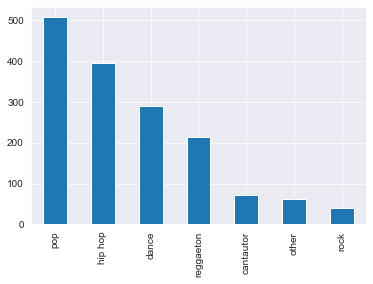

In [14]:
number_genres_new = data_ana_corona.genre_depurated_final.value_counts()
number_genres_new.plot.bar()
plt.show()

In [15]:
# Vamos a ver los pesos que tienen por años, respecto a los streams
data_group_streamstotal = data_ana_corona.groupby(['genre_depurated_final','year']).agg(['sum', 'count'])
data_group_streamstotal['streamstotal_weights']

sum  count
genre_depurated_final year                 
cantautor             2017  0.012336     15
                      2018  0.008848     15
                      2019  0.013609     18
                      2020  0.045138     24
dance                 2017  0.313083     96
                      2018  0.198108     89
                      2019  0.146820     64
                      2020  0.070127     42
hip hop               2017  0.169888     72
                      2018  0.269737    113
                      2019  0.274787     78
                      2020  0.249741    132
other                 2017  0.051896     23
                      2018  0.018321     14
                      2019  0.037531     15
                      2020  0.010006     10
pop                   2017  0.307635    126
                      2018  0.355928    124
                      2019  0.325328    136
                      2020  0.297460    121
reggaeton             2017  0.129028     36
                      2018  0.143896     32
                      2019  0.196564     54
                      2020  0.323284     92
rock                  2017  0.016134     16
                      2018  0.005163     14
                      2019  0.005359      7
                      2020  0.004244      3

NameError: name 'data_group_streamstotal2' is not defined

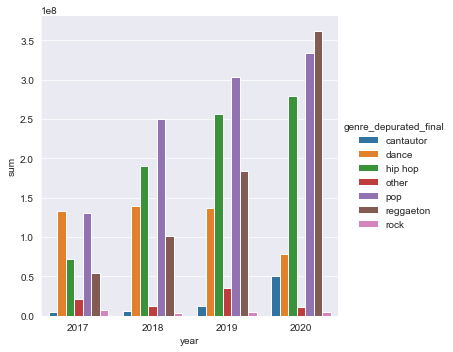

In [17]:
# Vamos a resetear el index para poder analizar mejor
data_group_streamstotal2 = data_group_streamstotal['Streamstotal']
data_group_streamstotal2.reset_index(inplace=True)

#Y hacemos cálculo de los streams totales de cada género depurado
sns.catplot(x='year', y='sum', hue='genre_depurated_final', data=data_group_streamstotal2, kind='bar')

In [19]:
data_group_streamstotal2

,genre_depurated_final,year,sum,count
0,cantautor,2017,5221747,15
1,cantautor,2018,6227040,15
2,cantautor,2019,12690328,18
3,cantautor,2020,50571544,24
4,dance,2017,132528108,96
5,dance,2018,139425699,89
6,dance,2019,136911211,64
7,dance,2020,78568166,42
8,hip hop,2017,71913546,72
9,hip hop,2018,189837055,113


Pero lo anterior tiene también el problema de que en el 2020 hay más streams totales, entonces habría que hacer proporcional a su total de streams por año.

In [26]:
year = 2017
genres = 'pop'
datos_ano = data_group_streamstotal2[data_group_streamstotal2['year'] == year]
percentage = 100 * datos_ano[datos_ano['genre_depurated_final'] == genre].sum()[2]/ data_group_streamstotal2[data_group_streamstotal2['year'] == year].sum()[2]
datos_ano

,genre_depurated_final,year,sum,count
0,cantautor,2017,5221747,15
4,dance,2017,132528108,96
8,hip hop,2017,71913546,72
12,other,2017,21967491,23
16,pop,2017,130221668,126
20,reggaeton,2017,54617542,36
24,rock,2017,6829464,16


      percentage
year            
2017       100.0
2018       100.0
2019       100.0
2020       100.0


'data_genre_pop = data_genre_years[data_genre_years[\'genre\'] == \'pop\']\nsns.catplot(x="year", y="percentage", data=data_genre_years[data_genre_years[\'genre\'] == \'pop\'], height=6, kind="bar", palette="muted")\nplt.title(\'pop\')\n\ndata_genre_reggaeton = data_genre_years[data_genre_years[\'genre\'] == \'reggaeton\']\nsns.catplot(x="year", y="percentage", data=data_genre_regga, height=6, kind="bar", palette="muted")\nplt.title(\'Reggaeton\')\n'

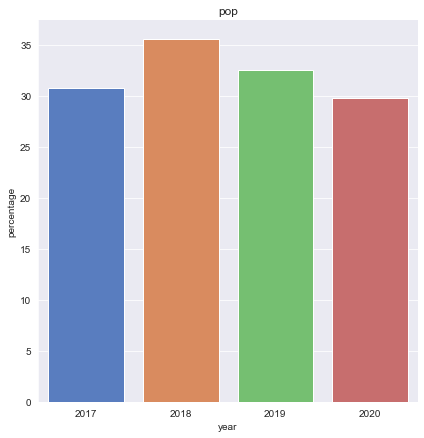

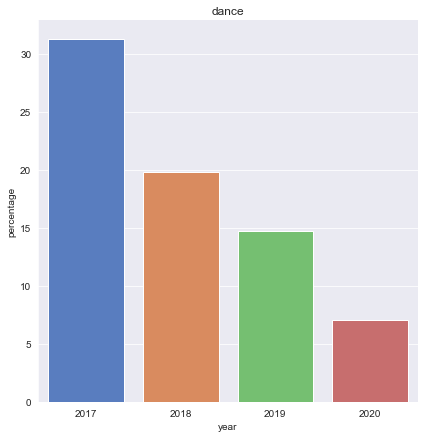

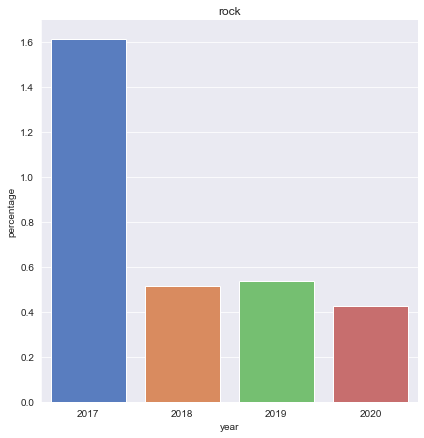

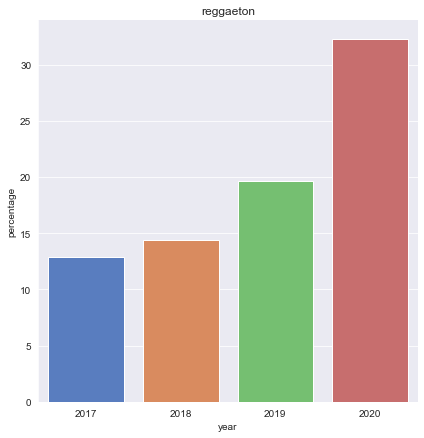

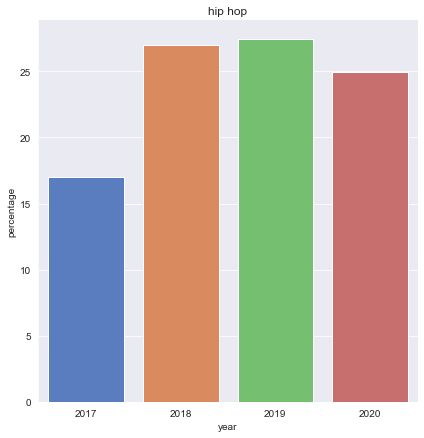

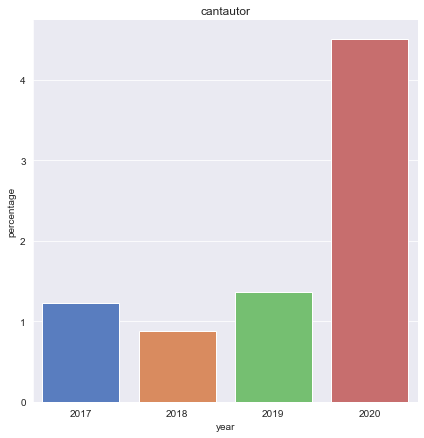

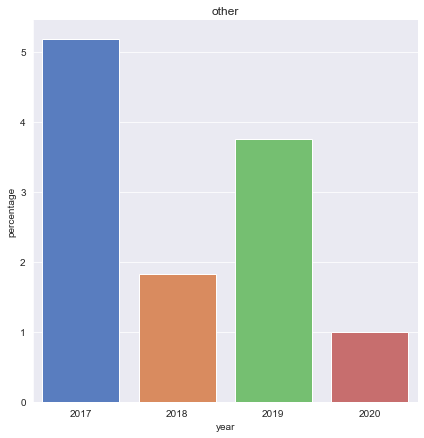

In [31]:
# Creo una función para extraerlo más fácil donde se mete el año y el género:
def extract_percentage(year, genre):
    datos_ano = data_group_streamstotal2[data_group_streamstotal2['year'] == year]
    percentage = 100 * datos_ano[datos_ano['genre_depurated_final'] == genre].sum()[2]/ data_group_streamstotal2[data_group_streamstotal2['year'] == year].sum()[2]
    return [year, genre, percentage]

# Y otra función para crear el dataframe resultante por año
def create_df_year(year):
    list_genres = ['pop', 'dance', 'rock','reggaeton','hip hop','cantautor', 'other']
    data_1 = extract_percentage(year, list_genres[0])
    data_2 = extract_percentage(year, list_genres[1])
    data_3 = extract_percentage(year, list_genres[2])
    data_4 = extract_percentage(year, list_genres[3])
    data_5 = extract_percentage(year, list_genres[4])
    data_6 = extract_percentage(year, list_genres[5])
    data_7 = extract_percentage(year, list_genres[6]) 
    df_new = pd.DataFrame([data_1, data_2,data_3,data_4,data_5,data_6,data_7,], columns = ['year', 'genre', 'percentage'])
    return df_new

# Guardo dataframes
data_genre_2017 = create_df_year(2017)
data_genre_2018 = create_df_year(2018)
data_genre_2019 = create_df_year(2019)
data_genre_2020 = create_df_year(2020)

# Junto dataframes
data_genre_years = pd.concat([data_genre_2017, data_genre_2018, data_genre_2019, data_genre_2020])

# Comprobamos que está bien
print(data_genre_years.groupby('year').sum())

# Hago función para que me saque el gráfico de cada género

genre_list = ['pop', 'dance','rock','reggaeton','hip hop', 'cantautor', 'other']
def graph_genre(genre):
    data_genre = data_genre_years[data_genre_years['genre'] == genre]
    sns.catplot(x="year", y="percentage", data=data_genre, height=6, kind="bar", palette="muted")
    plt.title(genre)
    return

for genre in genre_list:
    graph_genre(genre)

'''data_genre_pop = data_genre_years[data_genre_years['genre'] == 'pop']
sns.catplot(x="year", y="percentage", data=data_genre_years[data_genre_years['genre'] == 'pop'], height=6, kind="bar", palette="muted")
plt.title('pop')

data_genre_reggaeton = data_genre_years[data_genre_years['genre'] == 'reggaeton']
sns.catplot(x="year", y="percentage", data=data_genre_regga, height=6, kind="bar", palette="muted")
plt.title('Reggaeton')
'''

A partir decidí hacer los gráficos y análisis con Tableau y crear un dashboard con los datos, y lo he isnertado aquí con una imagen

In [39]:
# Exportamos para ver en Tableau
# data_genre_years.to_csv("data_totableau3.csv", sep = ',')

<img src="graphs_tableau/Genres_dashboard.png" style="width: 1000px;">

De primeras, más que diferencias entre periodos, lo que se puede ver que las tendencias que han seguido en los últimos 4 años, y solo ha habido cambiso de tendencia en el periodo de pandemia, en el caso del hip hop (reducción de streams) y reggaeton (aumento drástico de streams). Aún asñi

Conclusión: No se puede decir que la pandemia haya provocado un cambio relevante en el tipo de género de música que se escuchaba porque puede estar vinculado a otros factores como pueden ser los nuevos lanzamientos. Pero si hacemos una observación (abajo) sorbe esto último con las fechas de lanzamientos de determinados discos (mejor elegir albunes que canciones para agrupar más) y su género, para ver si tienen una vinculación
- En el 2020 hubo dos lanzamientos en el primer trimestre del año que tuvieron mucho éxito y están vinculados a reggaeton, eso puede significar el aumento drástico en los streams de reggaeton, AQUÍ SÍ QUE PUEDEN HABER AFECTADO LOS NUEVOS LANZAMIENTOS
- En el 2019 el mayor éxito en el periodo estaba vinculado a un grupo de hiphop, sin embargo no vemos uan gran diferencia con el año anterior.
- En el 2018 el mayor éxito fue un album o canción de pop, sin embargo, no se ve un aumento 

In [102]:
# Vemos los Release Dates de los albunes más escuchados
'''print('Lanzamiento de album YHLQMDLG, de Bad Bunny, de Reggaeton, 2020: ', data_ana_corona[data_ana_corona['album'] == 'YHLQMDLG']['release_date'][:1])
print('Lanzamiento de album Colores de J Balvin, de Reggaeton, 2020: ', data_ana_corona[data_ana_corona['album'] == 'Colores']['release_date'][:1])
print('Lanzamiento de album La Dura Vida del Joven Rapero de Don Patricio, de Hiphop, 2019: ', data_ana_corona[data_ana_corona['album'] == 'La Dura Vida del Joven Rapero']['release_date'][:1])
print('Lanzamiento de album ÷ (Deluxe) de Ed Sheeran, de Pop, 2019: ', data_ana_corona[data_ana_corona['album'] == '÷ (Deluxe)']['release_date'][:1])
print('Lanzamiento de album Despacito (Featuring Daddy Yankee) de Luis Fonsi, de Pop, 2018: ', data_ana_corona[data_ana_corona['album'] == 'Despacito (Featuring Daddy Yankee)']['release_date'][:1])
'''
# Mostramos los albunes más escuchados en el periodo
grouped = data_ana_corona.groupby(['year','genre_depurated_final','album','release_date']).sum().reset_index()
grouped.sort_values('Streamstotal', ascending=False).head(20)

,year,genre_depurated_final,album,release_date,Streams,Streamstotal,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,artist_followers,artist_popularity,streamstotal_weights
1200,2020,reggaeton,YHLQMDLG,2020-02-28,2940943,111152562,6.342581,15.71,3.4881,15.407,14.528,0.000449,2.7950,17.042974,2.609583,12.369,6.790835,80,485570180,19.595960,0.099210
1160,2020,reggaeton,Colores,2020-03-19,3869381,81693020,2.553552,7.91,1.0669,7.758,7.369,0.693537,1.6856,8.757420,1.622611,6.780,3.892638,41,220798800,9.696970,0.072916
681,2019,hip hop,La Dura Vida del Joven Rapero,2019-01-27,612176,34954623,1.450400,0.55,0.9389,3.023,2.407,0.005618,0.4467,3.140939,0.812102,2.602,1.510232,16,1624356,2.909091,0.037485
843,2019,pop,÷ (Deluxe),2017-03-03,65963,26316688,0.894045,1.73,0.7440,1.424,1.100,0.000000,0.1991,1.726494,0.082513,1.099,0.441869,7,138023254,1.858586,0.028221
969,2020,hip hop,Con Calma,2019-01-24,43454,23813270,0.305140,0.84,0.1100,0.737,0.860,0.000002,0.0574,0.932042,0.052258,0.656,0.210749,4,19671828,0.919192,0.021255
968,2020,hip hop,Con Altura,2019-03-28,52717,23640038,0.224108,0.82,0.3900,0.882,0.689,0.003250,0.0501,0.886901,0.145918,0.746,0.237300,4,3910183,0.828283,0.021100
983,2020,hip hop,Easy Money Baby,2020-01-24,682834,23252651,1.891717,5.03,1.8045,5.655,4.767,0.006439,1.3998,6.052692,1.041257,4.105,2.706630,28,19764857,6.505051,0.020754
489,2018,pop,Despacito (Featuring Daddy Yankee),2017-01-13,25924,21016174,0.394824,0.07,0.2090,0.660,0.786,0.000000,0.1120,0.862935,0.212507,0.846,0.770938,4,8731720,0.808081,0.029862
524,2018,pop,Odisea,2017-08-25,377462,20419563,1.722606,3.63,0.8540,3.685,3.506,0.001739,0.8663,4.234242,0.733353,2.936,2.341235,20,120383860,4.747475,0.029014
1198,2020,reggaeton,Tusa,2019-11-07,432730,19082982,0.324972,0.91,0.2950,0.803,0.715,0.000134,0.0574,0.911425,0.397800,0.574,0.258160,4,11614405,0.888889,0.017033


In [71]:
data_ana_corona[data_ana_corona['album'] == 'Colores']

,Track Name,Artist,Streams,date,spotify_id,year,Streamstotal,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genres_together,artist_id,artist_followers,artist_popularity,streamstotal_weights,genre_depurated,genre_depurated_final
81,Amarillo,J Balvin,619574,2020-03-20,6zEgnpM0qYmHLDnh8WPejL,2020,17463083,Colores,2020-03-19,0.214125,0.85,0.0130,0.641,0.857,0.005340,0.0695,0.831156,0.402142,0.961,0.402763,5,2020-01-01,latin,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano",1vyhD5VmyZ7KMfW5gqLgo5,22079880,0.969697,0.015587,reggaeton,reggaeton
82,Rojo,J Balvin,561102,2020-03-20,380HmhwTE2NJgawn1NwkXi,2020,14918019,Colores,2020-03-19,0.196141,0.84,0.1930,0.663,0.598,0.000080,0.0856,0.886408,0.212507,0.400,0.733602,4,2020-01-01,latin,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano",1vyhD5VmyZ7KMfW5gqLgo5,22079880,0.969697,0.013315,reggaeton,reggaeton
83,Morado,J Balvin,466559,2020-03-20,35KmOEIUqAGn02t7n4qaIr,2020,11700888,Colores,2020-03-19,0.323192,0.79,0.1310,0.885,0.680,0.000018,0.0875,0.893139,0.089172,0.780,0.230886,4,2020-01-01,latin,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano",1vyhD5VmyZ7KMfW5gqLgo5,22079880,0.969697,0.010444,reggaeton,reggaeton
84,Azul,J Balvin,387016,2020-03-20,2lCkncy6bIB0LTMT7kvrD1,2020,7877722,Colores,2020-03-19,0.337724,0.89,0.0816,0.843,0.836,0.001380,0.0532,0.937886,0.067024,0.650,0.210943,4,2020-01-01,latin,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano",1vyhD5VmyZ7KMfW5gqLgo5,22079880,0.969697,0.007031,reggaeton,reggaeton
85,Gris,J Balvin,372021,2020-03-20,1syf62zw48zu4FrPwMtDHk,2020,8975820,Colores,2020-03-19,0.262572,0.78,0.2290,0.849,0.709,0.000000,0.3290,0.864248,0.081355,0.916,0.204542,4,2020-01-01,latin,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano",1vyhD5VmyZ7KMfW5gqLgo5,22079880,0.969697,0.008011,reggaeton,reggaeton
86,Rosa,J Balvin,354483,2020-03-20,464uJVLmr0fDJGXOnciaDe,2020,4782773,Colores,2020-03-19,0.296421,0.75,0.2500,0.651,0.561,0.000109,0.4350,0.831484,0.328315,0.369,0.758637,4,2020-01-01,latin,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano",1vyhD5VmyZ7KMfW5gqLgo5,22079880,0.969697,0.004269,reggaeton,reggaeton
87,Negro,J Balvin,296468,2020-03-20,2hsA9YWuF3C9Gosi4dpjJN,2020,4652790,Colores,2020-03-19,0.276591,0.80,0.0157,0.795,0.911,0.206000,0.1310,0.945962,0.093080,0.800,0.679056,4,2020-01-01,latin,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano",1vyhD5VmyZ7KMfW5gqLgo5,22079880,0.969697,0.004153,reggaeton,reggaeton
88,Verde,J Balvin,287790,2020-03-20,3HTbI3yUJQw3fP0Po8qLcD,2020,3278020,Colores,2020-03-19,0.175181,0.75,0.0381,0.828,0.738,0.473000,0.0917,0.878102,0.041112,0.818,0.217470,4,2020-01-01,latin,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano",1vyhD5VmyZ7KMfW5gqLgo5,22079880,0.969697,0.002926,reggaeton,reggaeton
89,Blanco,J Balvin,279618,2020-03-20,5pXy29xzxR3aTB0SYRI590,2020,6258336,Colores,2020-03-19,0.183217,0.74,0.0302,0.872,0.692,0.007610,0.0871,0.842613,0.237116,0.693,0.250790,4,2020-01-01,latin,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano",1vyhD5VmyZ7KMfW5gqLgo5,22079880,0.969697,0.005586,reggaeton,reggaeton
90,Arcoíris,J Balvin,244750,2020-03-20,5zzbORcD0GwLY0wQHP1Xs1,2020,1785569,Colores,2020-03-19,0.288387,0.72,0.0853,0.731,0.787,0.000000,0.3160,0.846422,0.070787,0.393,0.203947,4,2020-01-01,latin,reggaeton,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano",1vyhD5VmyZ7KMfW5gqLgo5,22079880,0.969697,0.0015